In [1]:
from helper import downsampling
from bilinear_interpolation import *
from nearest_neighbour_interpolation import *
from bicubic_interpolation import *
from NEDI import *

from PIL import Image
from IPython.display import display
from math import log10, sqrt
import cv2
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

# Create low res image from input image. This operation does only need to be run once.

In [14]:
folder = 'data'
factor = 0.25

for filename in os.listdir(folder):
    if filename.lower().endswith('.jpg'):
        name, ext = os.path.splitext(filename)
        input_path = os.path.join(folder, filename)
        output_path = os.path.join(folder, f'LR-{name}{ext}')

        small_img = downsampling(input_path, factor)
        small_img.save(output_path)

# Displaying the first image as original and low resolution (LR)

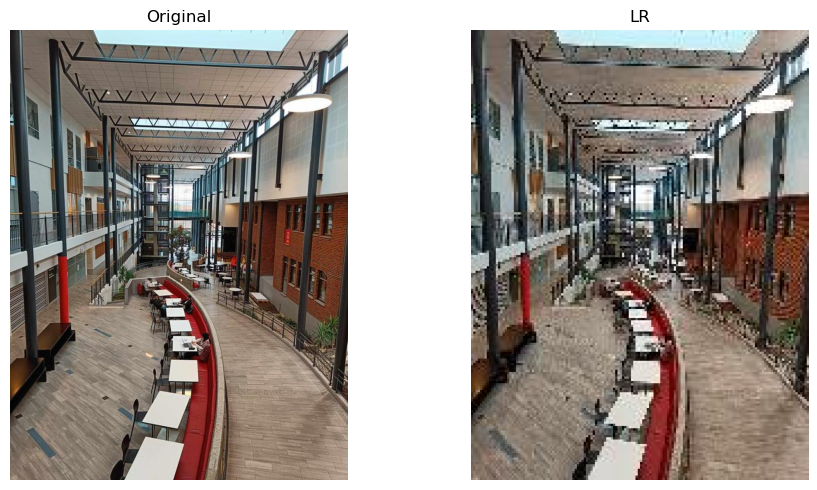

In [36]:
img_path = 'data/img7.jpg'
img_path_LR = 'data/LR-img7.jpg'

img = Image.open(img_path)
img_LR = Image.open(img_path_LR)

img_size = img.size
img_LR = img_LR.resize(img_size, resample = Image.NEAREST)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(img)
axes[0].set_title("Original")
axes[0].axis('off')

axes[1].imshow(img_LR)
axes[1].set_title("LR")
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Testing interpolation on one image

In [66]:
# https://www.geeksforgeeks.org/python-peak-signal-to-noise-ratio-psnr/
def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 

def SSIM(original, compressed):
    if original.ndim == 3:
        original = np.dot(original[..., :3], [0.2989, 0.5870, 0.1140])
    if compressed.ndim == 3:
        compressed = np.dot(compressed[..., :3], [0.2989, 0.5870, 0.1140])
    return ssim(original, compressed, data_range=compressed.max() - compressed.min())

In [ ]:
low_res_im = Image.open('data/LR-img7.jpg')
high_res_im = Image.open('data/img7.jpg')

scale_factor = 4
window_size = 
width, height = int(low_res_im.width*scale_factor), int(low_res_im.height*scale_factor)

nearest_neighbour_im = imresize_nn(low_res_im, width, height)
bilinear_im = imresize_bi(low_res_im, width, height)
bicubic_im = imresize_bicubic(low_res_im, width, height)
nedi_im = NEDI_predict(low_res_im, m=window_size, scale=scale_factor)

In [63]:
# Converting images to NumPy arrays for PSNR and SSIM calculation
original_np = np.array(high_res_im)
nearest_neighbour_np = np.array(nearest_neighbour_im)
bilinear_np = np.array(bilinear_im)
bicubic_np = np.array(bicubic_im)
nedi_np = np.array(nedi_im)

psnr_original = PSNR(original_np, original_np)
ssim_original = SSIM(original_np, original_np)

psnr_nearest_neighbour = PSNR(original_np, nearest_neighbour_np)
ssim_nearest_neighbour = SSIM(original_np, nearest_neighbour_np)

psnr_bilinear = PSNR(original_np, bilinear_np)
ssim_bilinear = SSIM(original_np, bilinear_np)

psnr_bicubic = PSNR(original_np, bicubic_np)
ssim_bicubic = SSIM(original_np, bicubic_np)

psnr_nedi = PSNR(original_np, nedi_np)
ssim_nedi = SSIM(original_np, nedi_np)

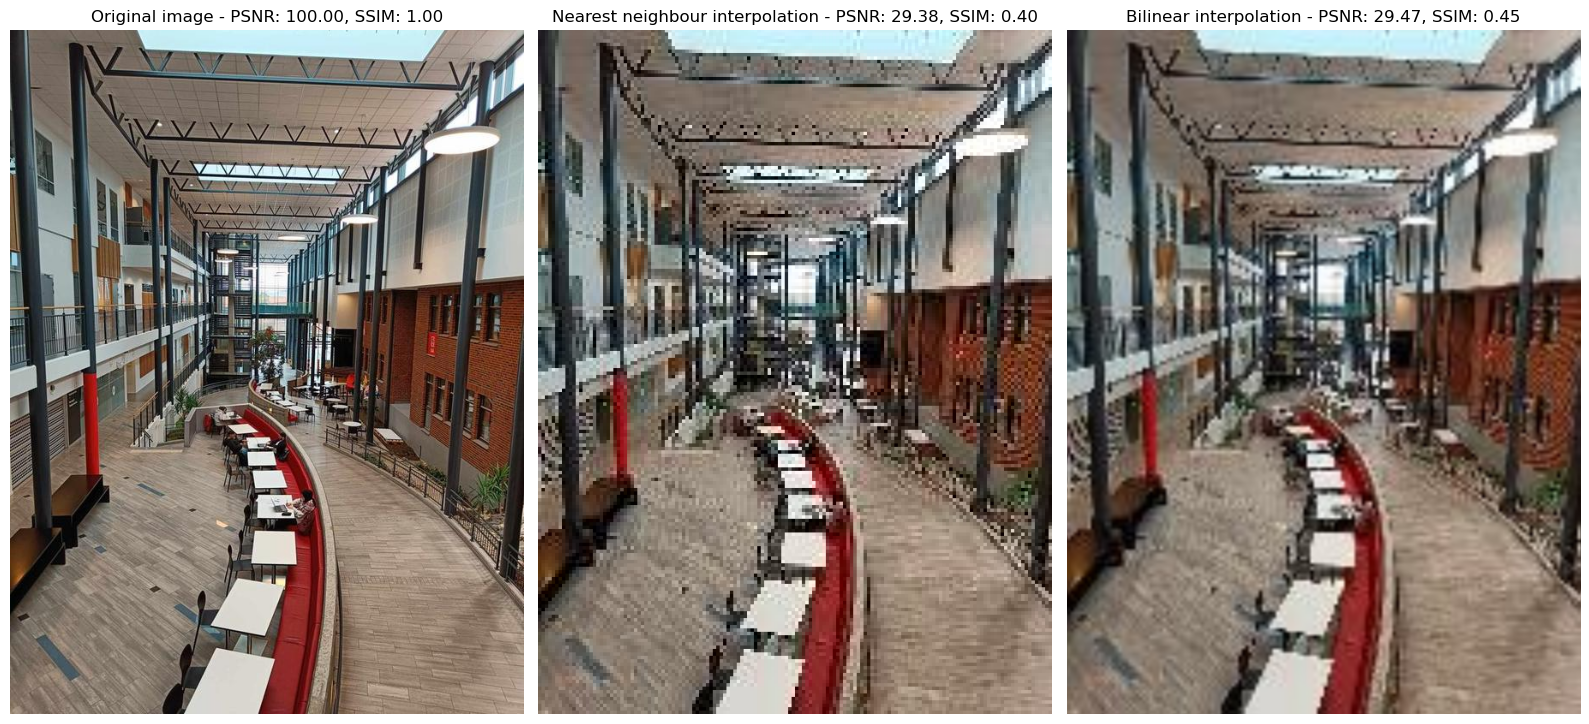

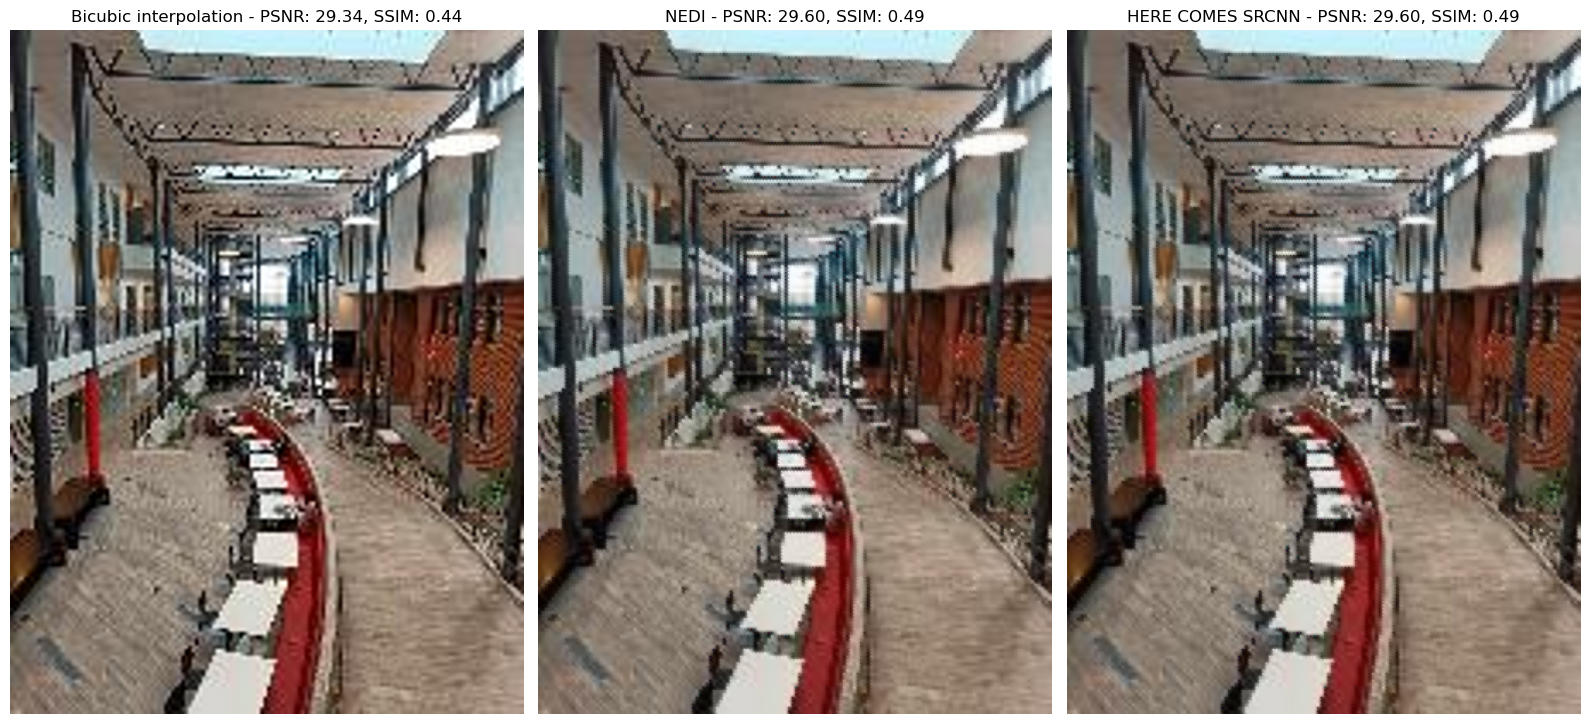

In [62]:
fig, axes = plt.subplots(1, 3, figsize=(16, 10))

axes[0].imshow(high_res_im)
axes[0].set_title(f"Original image - PSNR: {psnr_original:.2f}, SSIM: {ssim_original:.2f}")
axes[0].axis('off')

axes[1].imshow(nearest_neighbour_im)
axes[1].set_title(f"Nearest neighbour interpolation - PSNR: {psnr_nearest_neighbour:.2f}, SSIM: {ssim_nearest_neighbour:.2f}")
axes[1].axis('off')

axes[2].imshow(bilinear_im)
axes[2].set_title(f"Bilinear interpolation - PSNR: {psnr_bilinear:.2f}, SSIM: {ssim_bilinear:.2f}")
axes[2].axis('off')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(16, 10))

axes[0].imshow(bicubic_im)
axes[0].set_title(f"Bicubic interpolation - PSNR: {psnr_bicubic:.2f}, SSIM: {ssim_bicubic:.2f}")
axes[0].axis('off')

axes[1].imshow(nedi_im)
axes[1].set_title(f"NEDI - PSNR: {psnr_nedi:.2f}, SSIM: {ssim_nedi:.2f}")
axes[1].axis('off')

axes[2].imshow(nedi_im)
axes[2].set_title(f"HERE COMES SRCNN - PSNR: {psnr_nedi:.2f}, SSIM: {ssim_nedi:.2f}")
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Interpolation for all images

In [67]:
## All outputs are saved under results.
# nn - Nearest Neighbour interpolation
# bil - Bilinear interpolation
# bic - Bicubic interpolation
# nedi - New Edge Directed interpolation
# srcnn - super resolution convolutional neural network

scale_factor = 4
window_size = 4
data_folder = 'data'
result_folder = 'result'
os.makedirs(result_folder, exist_ok=True)

PSNR_scores = {'nn': [], 'bil': [], 'bic': [], 'nedi': []}
SSIM_scores = {'nn': [], 'bil': [], 'bic': [], 'nedi': []}

for i in range(1, 11):
    print(f"Processing img{i}: \n")

    # File paths
    lr_path = os.path.join(data_folder, f'LR-img{i}.jpg')
    hr_path = os.path.join(data_folder, f'img{i}.jpg')

    # Loading images
    low_res_im = Image.open(lr_path)
    high_res_im = Image.open(hr_path)

    original_np = np.array(high_res_im)

    # Target size
    width, height = int(low_res_im.width*scale_factor), int(low_res_im.height*scale_factor)

    # Interpolation methods
    nearest_neighbour_im = imresize_nn(low_res_im, width, height)
    nearest_neighbour_im.save(os.path.join(result_folder, f'img{i}_nn.jpg'))
    nearest_neighbour_np = np.array(nearest_neighbour_im)
    psnr_nn = PSNR(original_np, nearest_neighbour_np)
    ssim_nn = SSIM(original_np, nearest_neighbour_np)
    PSNR_scores['nn'].append(psnr_nn)
    SSIM_scores['nn'].append(ssim_nn)

    bilinear_im = imresize_bi(low_res_im, width, height)
    bilinear_im.save(os.path.join(result_folder, f'img{i}_bil.jpg'))
    bilinear_np = np.array(bilinear_im)
    psnr_bil = PSNR(original_np, bilinear_np)
    ssim_bil = SSIM(original_np, bilinear_np)
    PSNR_scores['bil'].append(psnr_bil)
    SSIM_scores['bil'].append(ssim_bil)

    bicubic_im = imresize_bicubic(low_res_im, width, height)
    bicubic_im.save(os.path.join(result_folder, f'img{i}_bic.jpg'))
    bicubic_np = np.array(bicubic_im)
    psnr_bic = PSNR(original_np, bicubic_np)
    ssim_bic = SSIM(original_np, bicubic_np)
    PSNR_scores['bic'].append(psnr_bic)
    SSIM_scores['bic'].append(ssim_bic)

    nedi_im = NEDI_predict(low_res_im, m=window_size, scale=scale_factor)
    nedi_im.save(os.path.join(result_folder, f'img{i}_nedi.jpg'))
    nedi_np = np.array(nedi_im)
    psnr_nedi = PSNR(original_np, nedi_np)
    ssim_nedi = SSIM(original_np, nedi_np)
    PSNR_scores['nedi'].append(psnr_nedi)
    SSIM_scores['nedi'].append(ssim_nedi)

    print(f'PSNR: {psnr_nn:.2f}, SSIM: {ssim_nn:.2f} - Nearest neighbour interpolation')
    print(f'PSNR: {psnr_bil:.2f}, SSIM: {ssim_bil:.2f} - Bilinear interpolation')
    print(f'PSNR: {psnr_bic:.2f}, SSIM: {ssim_bic:.2f} - Bicubic interpolation')
    print(f'PSNR: {psnr_nedi:.2f}, SSIM: {ssim_nedi:.2f} - New Edge Directed interpolation')

Processing img1...
Nearest neighbour interpolation - PSNR: 29.85, SSIM: 0.46
Bilinear interpolation - PSNR: 29.99, SSIM: 0.51
Bicubic interpolation - PSNR: 29.81, SSIM: 0.49
NEDI - PSNR: 30.11, SSIM: 0.54
Processing img2...
Nearest neighbour interpolation - PSNR: 29.37, SSIM: 0.40
Bilinear interpolation - PSNR: 29.46, SSIM: 0.45
Bicubic interpolation - PSNR: 29.34, SSIM: 0.44
NEDI - PSNR: 29.59, SSIM: 0.50
Processing img3...
Nearest neighbour interpolation - PSNR: 29.75, SSIM: 0.46
Bilinear interpolation - PSNR: 29.77, SSIM: 0.52
Bicubic interpolation - PSNR: 29.59, SSIM: 0.51
NEDI - PSNR: 29.94, SSIM: 0.56
Processing img4...
Nearest neighbour interpolation - PSNR: 29.41, SSIM: 0.38
Bilinear interpolation - PSNR: 29.45, SSIM: 0.39
Bicubic interpolation - PSNR: 29.39, SSIM: 0.39
NEDI - PSNR: 29.56, SSIM: 0.44
Processing img5...
Nearest neighbour interpolation - PSNR: 30.01, SSIM: 0.44
Bilinear interpolation - PSNR: 30.06, SSIM: 0.47
Bicubic interpolation - PSNR: 29.99, SSIM: 0.47
NEDI -

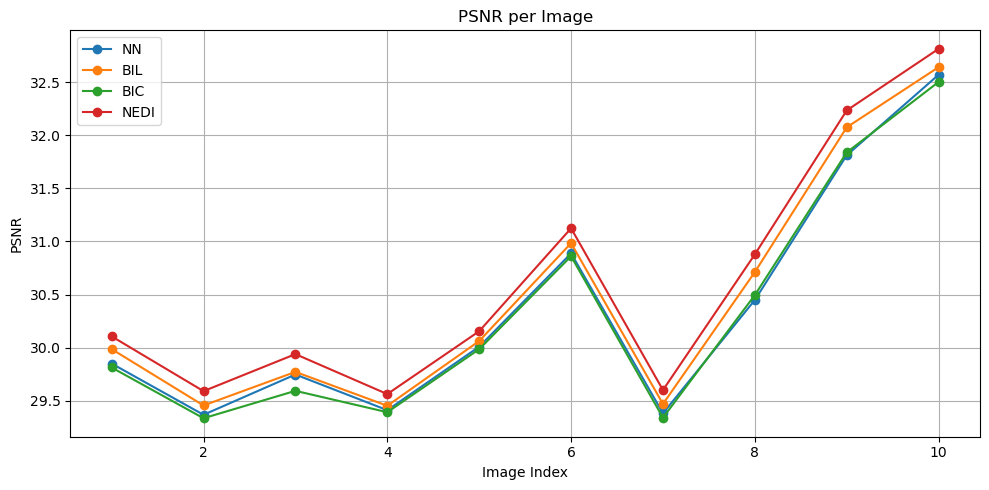

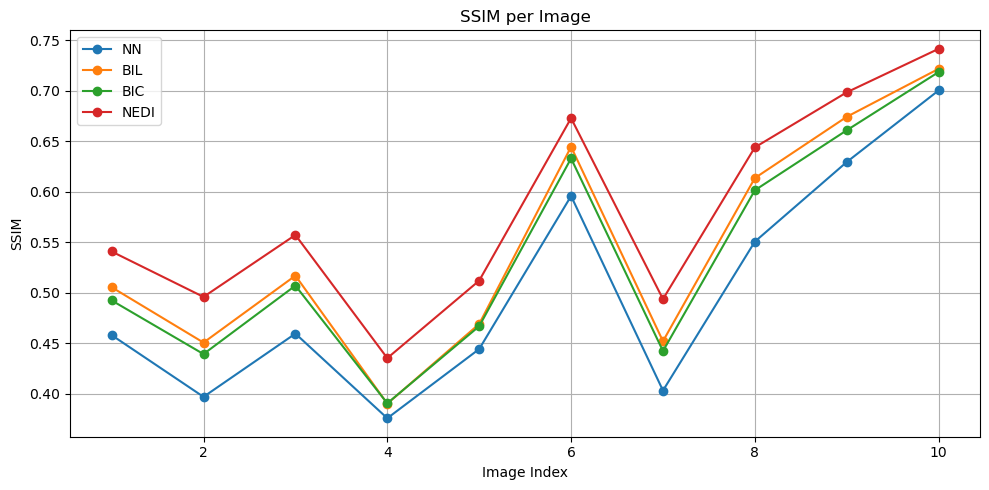

In [69]:
plt.figure(figsize=(10, 5))
for i in PSNR_scores:
    plt.plot(range(1, 11), PSNR_scores[i], label=i.upper(), marker='o')
plt.xlabel("Image Index")
plt.ylabel("PSNR")
plt.title("PSNR per Image")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(result_folder, "PSNR_plot.png"))
#plt.close()

plt.figure(figsize=(10, 5))
for i in SSIM_scores:
    plt.plot(range(1, 11), SSIM_scores[i], label=i.upper(), marker='o')
plt.xlabel("Image Index")
plt.ylabel("SSIM")
plt.title("SSIM per Image")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(result_folder, "SSIM_plot.png"))
#plt.close()

#### summere alle per bildeindex og dele på 4. Plotte differanse mellom snitt og enkeltmodell